In [23]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
cwd = os.getcwd()
data_path = os.path.join(cwd,'onsight_case.csv')
raw_data = pd.read_csv(data_path)
data = raw_data.fillna(0)

In [25]:
data

,SapKundeId,0,1,2,3,4,5,6,7,8,...,32,33,34,35,36,37,38,39,40,41
0,7700383178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7700393087,5358.0,20795.0,3817.0,18274.0,2518.0,0.0,0.0,0.0,10495.0,...,0.0,1099.0,0.0,0.0,0.0,0.0,22784.0,0.0,0.0,0.0
2,7700430593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7700465256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7700470198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,7734240121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43820,7734240513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43821,7734241263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1449.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43822,7734242260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
customer_id = pd.DataFrame()
customer_id['id'] = data['SapKundeId']
data = data.drop(['SapKundeId'], axis=1)

In [27]:
customer_id['num_cat']= data.select_dtypes(np.number).gt(0).sum(axis=1)
customer_id['money_spent'] = data.sum(axis=1).astype(int)
customer_id

,id,num_cat,money_spent
0,7700383178,3,6095
1,7700393087,21,1430788
2,7700430593,1,2995
3,7700465256,1,1295
4,7700470198,1,22784
...,...,...,...
43819,7734240121,2,6000
43820,7734240513,1,3900
43821,7734241263,1,1449
43822,7734242260,1,5100


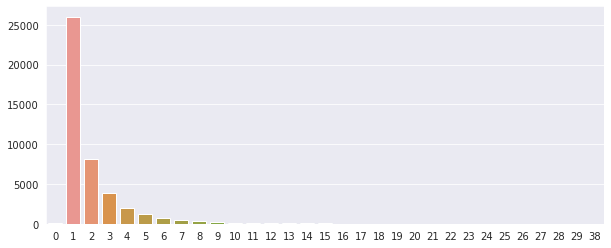

In [38]:
cat = customer_id.num_cat.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=cat.index, y=cat.values)
plt.show()

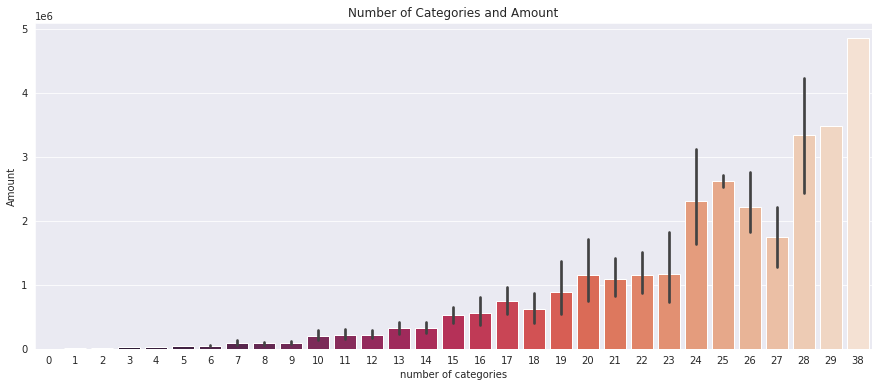

In [29]:
plt.figure(figsize=(15,6))
sns.barplot(x=customer_id['num_cat'], y=customer_id['money_spent'], palette="rocket")
plt.title("Number of Categories and Amount")
plt.xlabel("number of categories")
plt.ylabel("Amount")
plt.show()

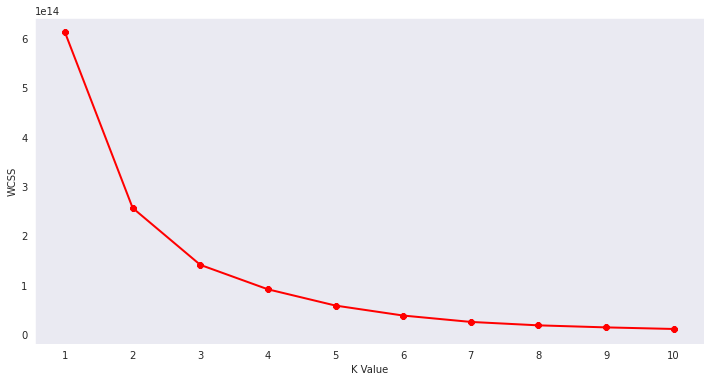

In [30]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(customer_id.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [31]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(customer_id.iloc[:,1:])
customer_id["cluster_label"] = clusters

In [32]:
customer_id

,id,num_cat,money_spent,cluster_label
0,7700383178,3,6095,0
1,7700393087,21,1430788,1
2,7700430593,1,2995,0
3,7700465256,1,1295,0
4,7700470198,1,22784,0
...,...,...,...,...
43819,7734240121,2,6000,0
43820,7734240513,1,3900,0
43821,7734241263,1,1449,0
43822,7734242260,1,5100,0


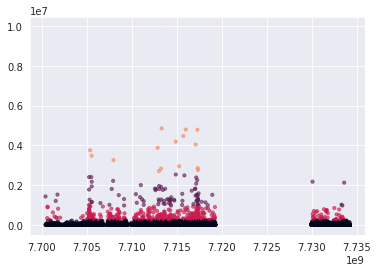

In [33]:
plt.scatter(customer_id.id, customer_id.money_spent, c=customer_id.cluster_label, alpha = 0.6, s=10)

id               43342
num_cat          43342
money_spent      43342
cluster_label    43342
dtype: int64

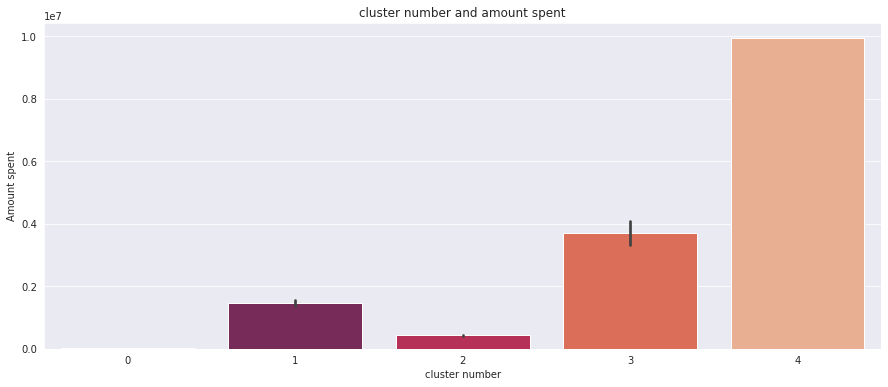

In [39]:
plt.figure(figsize=(15,6))
sns.barplot(x=customer_id['cluster_label'], y=customer_id['money_spent'], palette="rocket")
plt.title("cluster number and amount spent")
plt.xlabel("cluster number")
plt.ylabel("Amount spent")
plt.show()